In [1]:
import numpy as np
np.random.seed(42)

# 1. Import Data

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

## 2. Split test set & train set

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 3. Feature engineering (output)

In [4]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## 4. Fit a model
## 4.1 Stochastic Gradient Descent

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

## 4.2 Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# 5. Evaluation
## 5.1 Cross-validation
Over-fitting: use a train set, a test set AND a validation set. Or use **cross-validation** to have an average of the accuracy + precision of this measurement.

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9502 ,  0.96565,  0.96495])

## 5.2 Confusion Matrix

In [7]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53272,  1307],
       [ 1077,  4344]])

## 5.3 Precision / rappel

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
print "precision: " + str(precision_score(y_train_5, y_train_pred)) + " accuracy of true positives"
print "recall: " + str(recall_score(y_train_5, y_train_pred)) + "    rate of true positives being correctly detected aka sensibility"
print "f1-score: " + str(f1_score(y_train_5, y_train_pred))

precision: 0.768713502035 accuracy of true positives
recall: 0.801328168235    rate of true positives being correctly detected aka sensibility
f1-score: 0.784682080925


In [9]:
import matplotlib.pyplot as plt

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from utils import plot_precision_recall_vs_threshold
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

NameError: name 'plt' is not defined

## 5.4 ROC & AUC

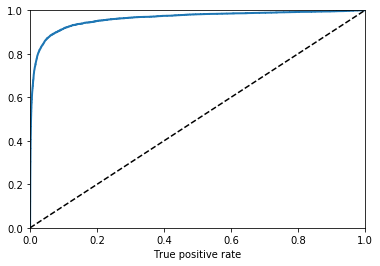

In [12]:
from sklearn.metrics import roc_curve
from utils import plot_roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plot_roc_curve(fpr, tpr)
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
print "AUC of ROC: " + str(roc_auc_score(y_train_5, y_scores))

AUC of ROC: 0.962449655597


## 5.4 Comparison of 2 models

/usr/local/lib/python2.7/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "buttom right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


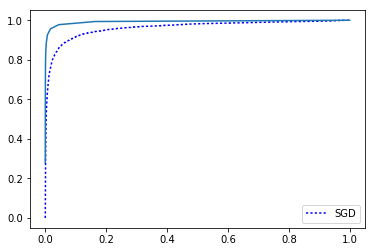

In [14]:
# We need score
y_scores_forest = y_probas_forest[:, 1] # probability of the class "true"
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest)
plt.legend(loc="buttom right")
plt.show()

RandomForest ist obviously a better model.